> ## Project: Identify Customer Segments done by learner `Nancy Ahmad` 9/2022 😊


**========================================================================================================**




In this project, I learned and practice about unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. 




These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that I used has been provided by `Udacity` partners at `Bertelsmann Arvato Analytics`, and represents a real-life data science task.


.
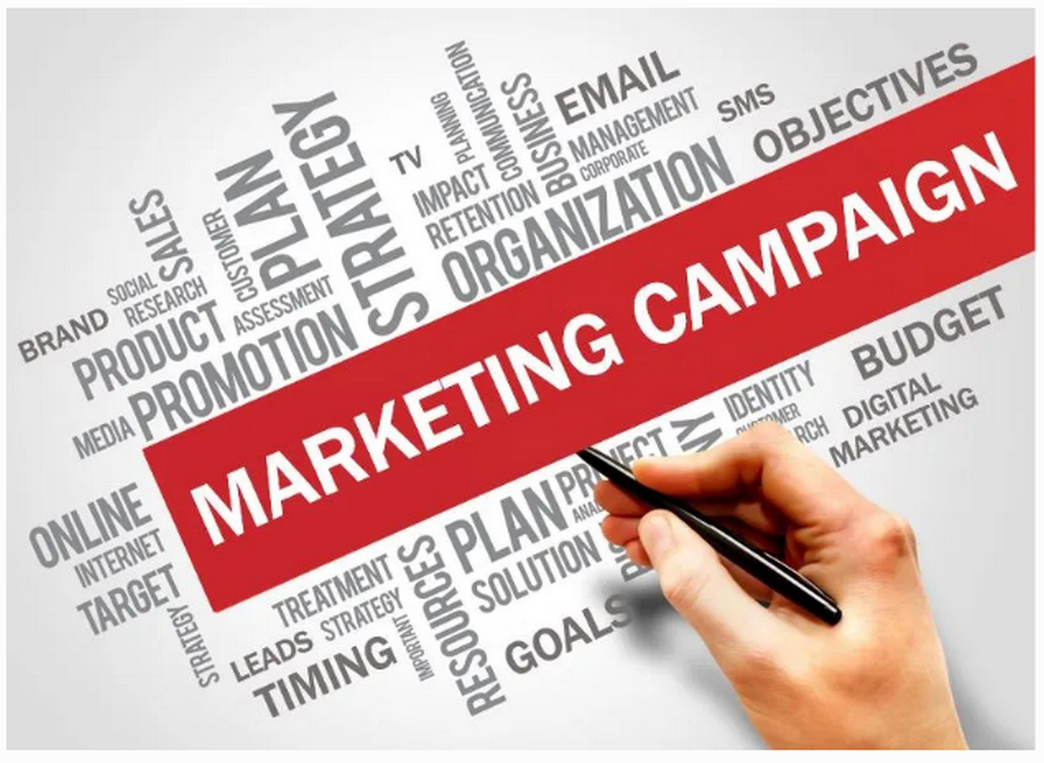

.

> ### In my notebook I perform analysis steps.



In each step of the project, I added some text describing for the subtask that perform, followed steps by one or more code cells for you to complete the work. 








# <a id='0'>Content</a>

==================

- <a href='#1'>Step 0: Load the Data</a>  
- <a href='#2'> Step 1: Preprocessing  </a>  
- <a href='#3'>Step 3: Clustering </a>  

- <a href='#10'>hint </a>







In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.

'''


### Here I Import more libraries to used 

from sklearn.cluster import KMeans ## as advised from udacity comment I will use ((sklearn ))

from sklearn.preprocessing import StandardScaler, Imputer





## <a id="1">Step 0: Load the Data</a>





There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep = ';')


> # 💡 Hint


> ================



### Now , I will explore my detaset file and feature summary file.




> **So , when I make my Preprocessing and I will check the file element and shape be aware of my study files** 


.

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.head(7) ## print the number ( 7) it is my luck number

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0


In [4]:
## Now I will check the static ideas by using describe() function 

azdias.describe()


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [5]:
## here I will check the the row and columns ideas by using (shape ) function 

azdias.shape

(891221, 85)

## Notes as mentioned in the file description above I find 

-  We got 891221 ( row)  whih mean we got 891221 observations and 85 features (columns) in the original dataset.

-  We got many missing values with zero value 

In [6]:
feat_info.head(7) ## Also here print the number ( 7) it is my luck number 💡💡

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]


**here I checked the  Data Dictionary.md  file to understand the negative and zero  values  in the column and here is the description I found**


### 1.1. AGER_TYP
Best-ager typology
- -1: unknown
-  0: no classification possible
-  1: passive elderly
-  2: cultural elderly
-  3: experience-driven elderly

> ### And I will clean these values later in the next steps 

In [7]:
## Lets check the the row and columns ideas for ( feat_info )  by using (shape ) function 

feat_info.shape

(85, 4)

### As mentioned in the description above, which made me sure the dataset is uploaded properly and I can move to the next steps



 #  <a id="2">Step 1: Preprocessing</a>




.  **========================**



 > ## `Step 1.1: Assess Missing Data`




**The instruction form the project notebook** : feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!


.

#### Step 1.1.1: Convert Missing Value Codes to NaNs

==========================================


The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

> ## Now I work these codes cells 

In [8]:
# to explore the (feat_info) file and know its columns 

feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [9]:
## to explore information about the DataFrame I use  info() method 

feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


### The result 

===================

Now the information from the cell above show me **what the number of columns and the number of cells in each column (non-null values)** which I want to know 


Also extra information as:  range index ,column labels, column data typesand the memory usage.


> ### Also we can see the (( missing_or_unknown )) from the Data columns which we need to clean 

In [10]:
## to know the original missing values number
print('The original missing values is {}'.format(azdias.isnull().sum().sum()))

The original missing values is 4896838


In [11]:
## make a loop to located our changes column 

for col in range(len(feat_info)):
    
## we create new columns for the (( missing_or_unknown )) to make changes on it  

    MissingToRemove = feat_info.iloc[col]['missing_or_unknown']  

## The changes required here is remove [] so we can make our loop and clear our data 
    MissingToRemove = MissingToRemove.strip('[')
    MissingToRemove = MissingToRemove.strip(']')
    MissingToRemove = MissingToRemove.split(sep=',')
## change the data type 
    MissingToRemove = [int(value) if (value!='X' and value!='XX' and value!='') else value for value in MissingToRemove]
##  When do not have missing values 
    if MissingToRemove != ['']:
        azdias = azdias.replace({feat_info.iloc[col]['attribute']: MissingToRemove}, np.nan)

In [12]:
print('The result missing values is {}'.format(azdias.isnull().sum().sum()))

The result missing values is 8373929


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?


.




In [13]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

missing_4each_column = azdias.isnull().mean().sort_values(ascending  = False)*100

missing_4each_column

TITEL_KZ                 99.757636
AGER_TYP                 76.955435
KK_KUNDENTYP             65.596749
KBA05_BAUMAX             53.468668
GEBURTSJAHR              44.020282
ALTER_HH                 34.813699
REGIOTYP                 17.735668
KKK                      17.735668
W_KEIT_KIND_HH           16.605084
KBA05_ANTG4              14.959701
KBA05_GBZ                14.959701
MOBI_REGIO               14.959701
KBA05_ANTG1              14.959701
KBA05_ANTG2              14.959701
KBA05_ANTG3              14.959701
PLZ8_GBZ                 13.073637
PLZ8_HHZ                 13.073637
PLZ8_BAUMAX              13.073637
PLZ8_ANTG4               13.073637
PLZ8_ANTG1               13.073637
PLZ8_ANTG3               13.073637
PLZ8_ANTG2               13.073637
SHOPPER_TYP              12.476816
VERS_TYP                 12.476816
HEALTH_TYP               12.476816
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
KBA13_ANZAHL_PKW         11.871354
ANZ_HAUSHALTE_AKTIV 

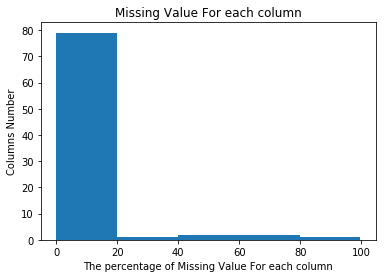

In [14]:
# Investigate patterns in the amount of missing data in each column.

plt.hist(missing_4each_column, bins= 5)
plt.title("Missing Value For each column")
plt.ylabel('Columns Number')
plt.xlabel('The percentage of Missing Value For each column')
plt.show()

In [15]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

outlierOver40 = missing_4each_column[missing_4each_column>40]
outlierOver40


TITEL_KZ        99.757636
AGER_TYP        76.955435
KK_KUNDENTYP    65.596749
KBA05_BAUMAX    53.468668
GEBURTSJAHR     44.020282
dtype: float64

> ### Now ,I will drop columns that have more than 80 percent missing data

In [16]:

azdias.drop(outlierOver40.index, axis=1 , inplace = True)



#### Discussion 1.1.2: Assess Missing Data in Each Column

> **The Answer**

=====================


**The observations**  we can clearly notice regarding the amount of missing data in each column is most columns have less than 40% missing data,so there missing values, and **many columns were removed from the dataset such as:**  'AGER_TYP', 'ALTER_HH', 'KK_KUNDENTYP', 'GEBURTSJAHR', 'TITEL_KZ', 'KBA05_BAUMAX'.




#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [17]:
# How much data is missing in each row of the dataset?

missing_4each_row = azdias.isnull().sum(axis=1)

missing_4each_row.head()

0    44
1     1
2     0
3     7
4     0
dtype: int64

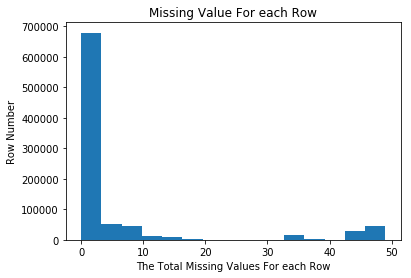

In [18]:
## make our visualization to explore our Row Missing Values

plt.hist(missing_4each_row, bins= 15) ## I make a bin here (15) to get a more clear visualization 
plt.title("Missing Value For each Row")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each Row')
plt.show()


> ### Now ,From the above visualization I will make  two subsets ( as instruction required ) depending on the bin (15) 

In [19]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

RowMissOver15 = missing_4each_row[missing_4each_row >=15] ##
RowMissOver15.head()

0     44
11    48
14    48
17    48
24    48
dtype: int64

In [20]:
# Write code to divide the data into two subsets based on the number of missing values in each row.

RowMissOver15 = azdias[azdias.isna().sum(axis=1)>15]

RowMissBelow15 = azdias[azdias.isna().sum(axis=1)<15]


In [21]:
## Check our code 
RowMissOver15.head()



,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2.0,1,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,3.0,1,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2.0,1,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,3.0,2,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
## Check our code 
RowMissBelow15.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [23]:
## now make located to our subsets

azdiasOver15 = azdias.iloc[RowMissOver15.index,:]

azdiasBelow15 = azdias.iloc[RowMissBelow15.index,:]


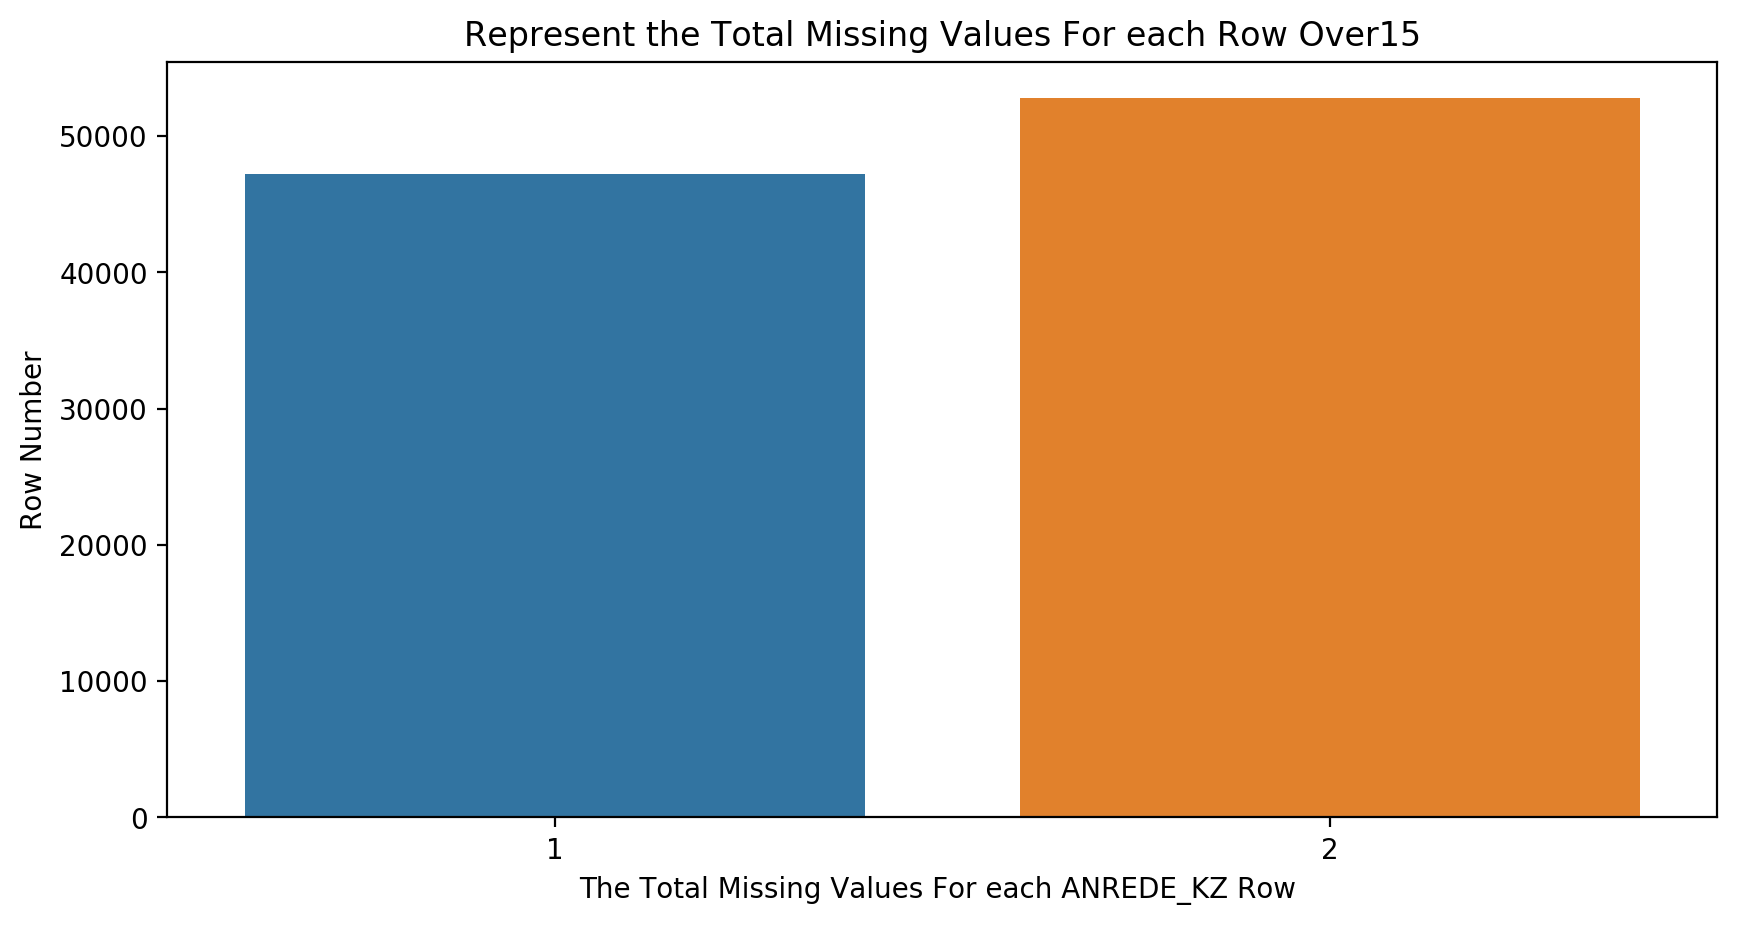

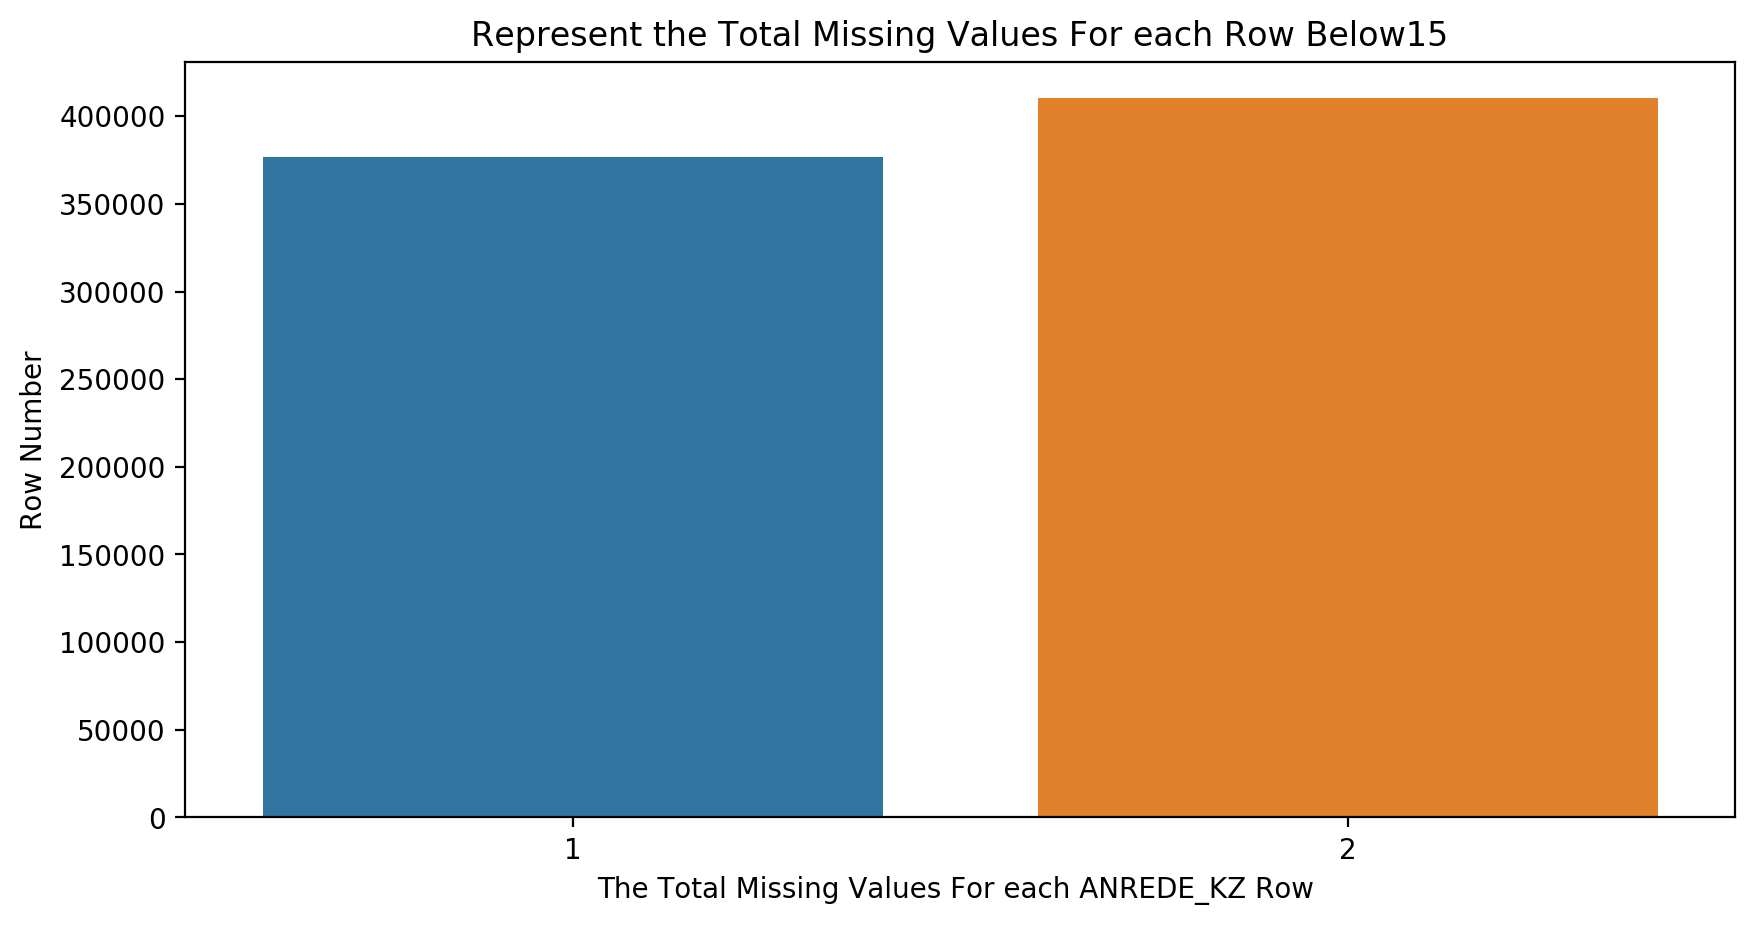

In [24]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.


## first charts
# ============
plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasOver15['ANREDE_KZ'])
plt.title("Represent the Total Missing Values For each Row Over15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each ANREDE_KZ Row ')

plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasBelow15['ANREDE_KZ'])
plt.title("Represent the Total Missing Values For each Row Below15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each ANREDE_KZ Row ')


plt.show()

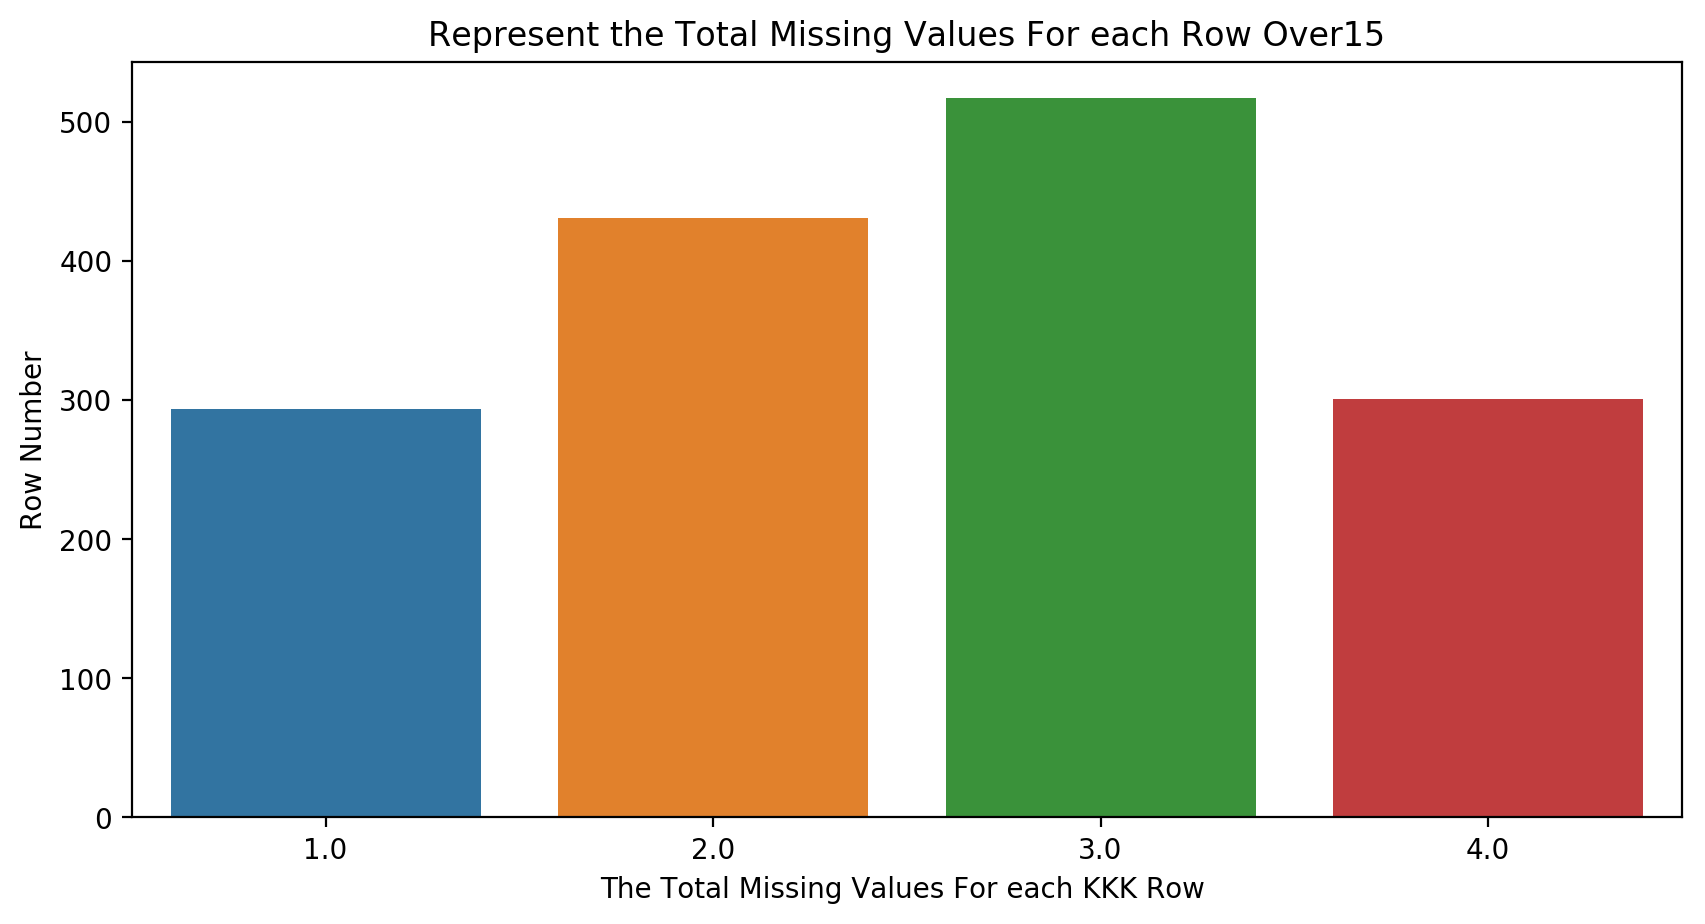

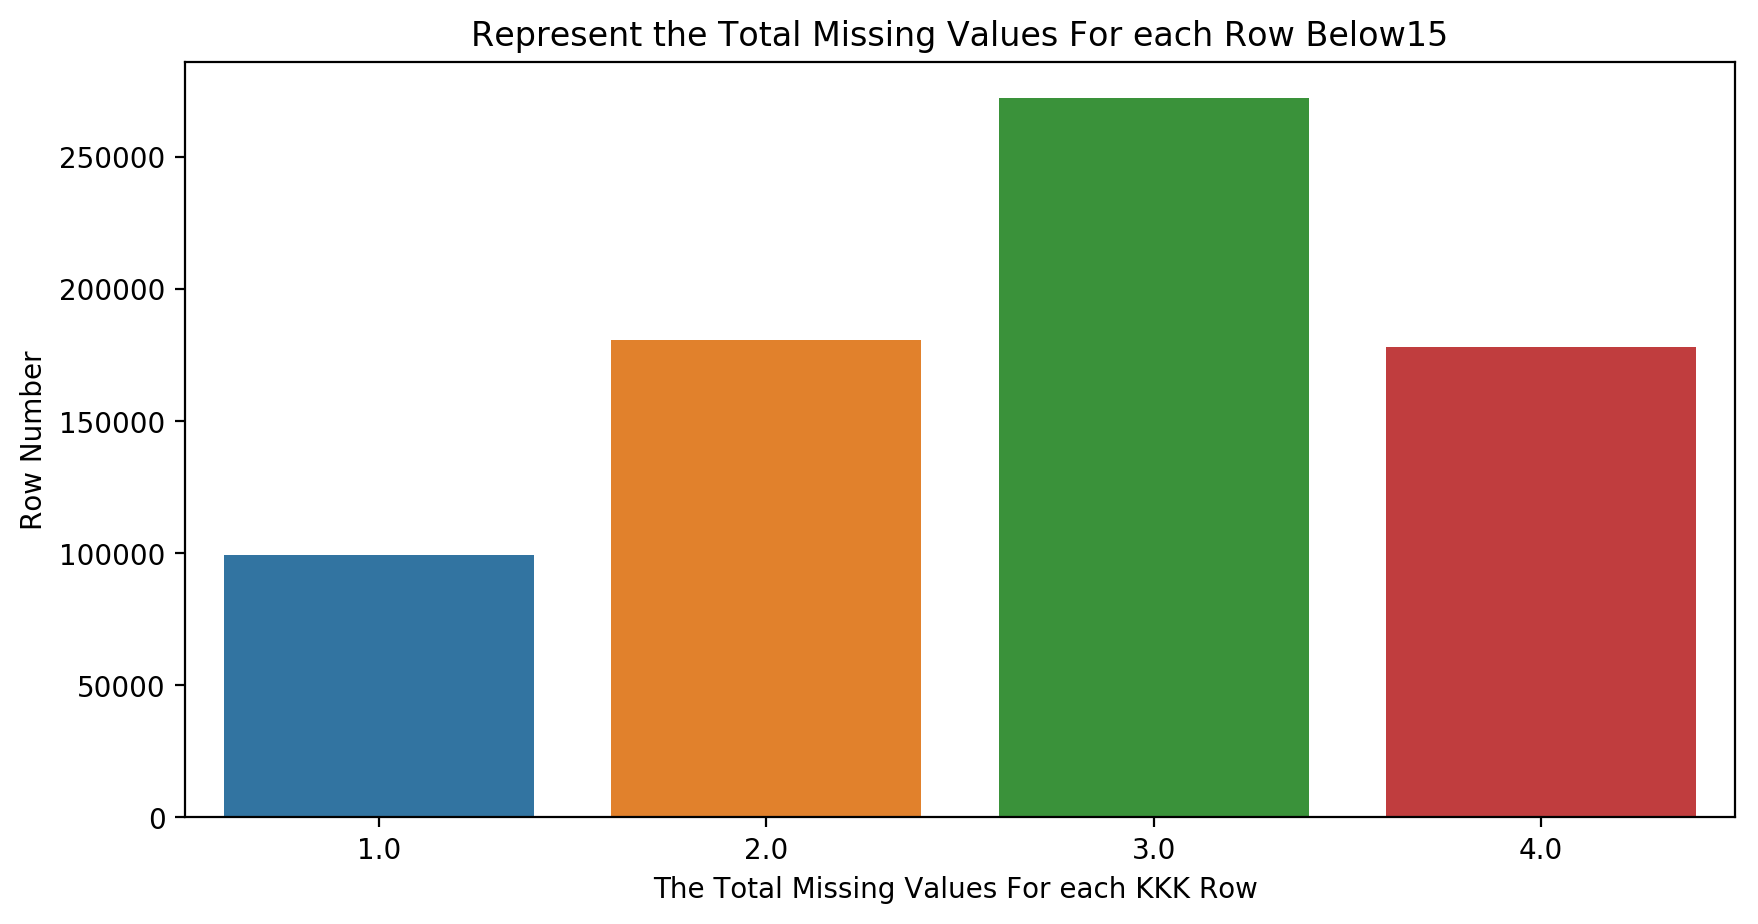

In [25]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.


## Second charts
# ============
plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasOver15['KKK'])
plt.title("Represent the Total Missing Values For each Row Over15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each KKK Row ')

plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasBelow15['KKK'])
plt.title("Represent the Total Missing Values For each Row Below15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each KKK Row ')


plt.show()

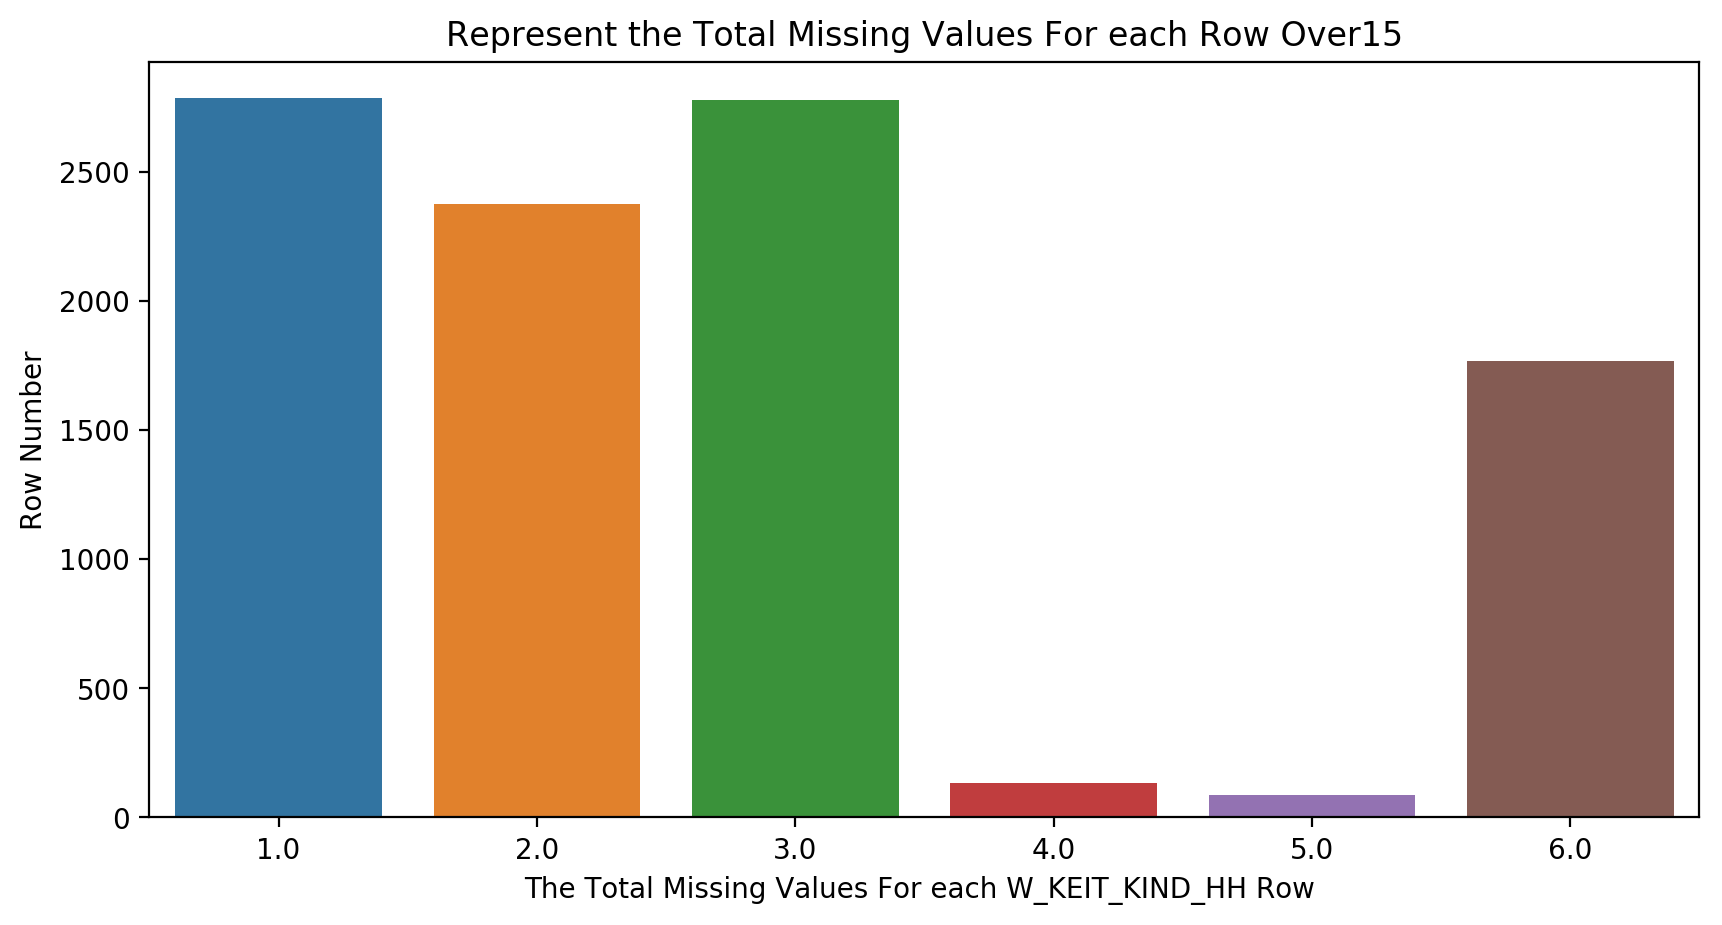

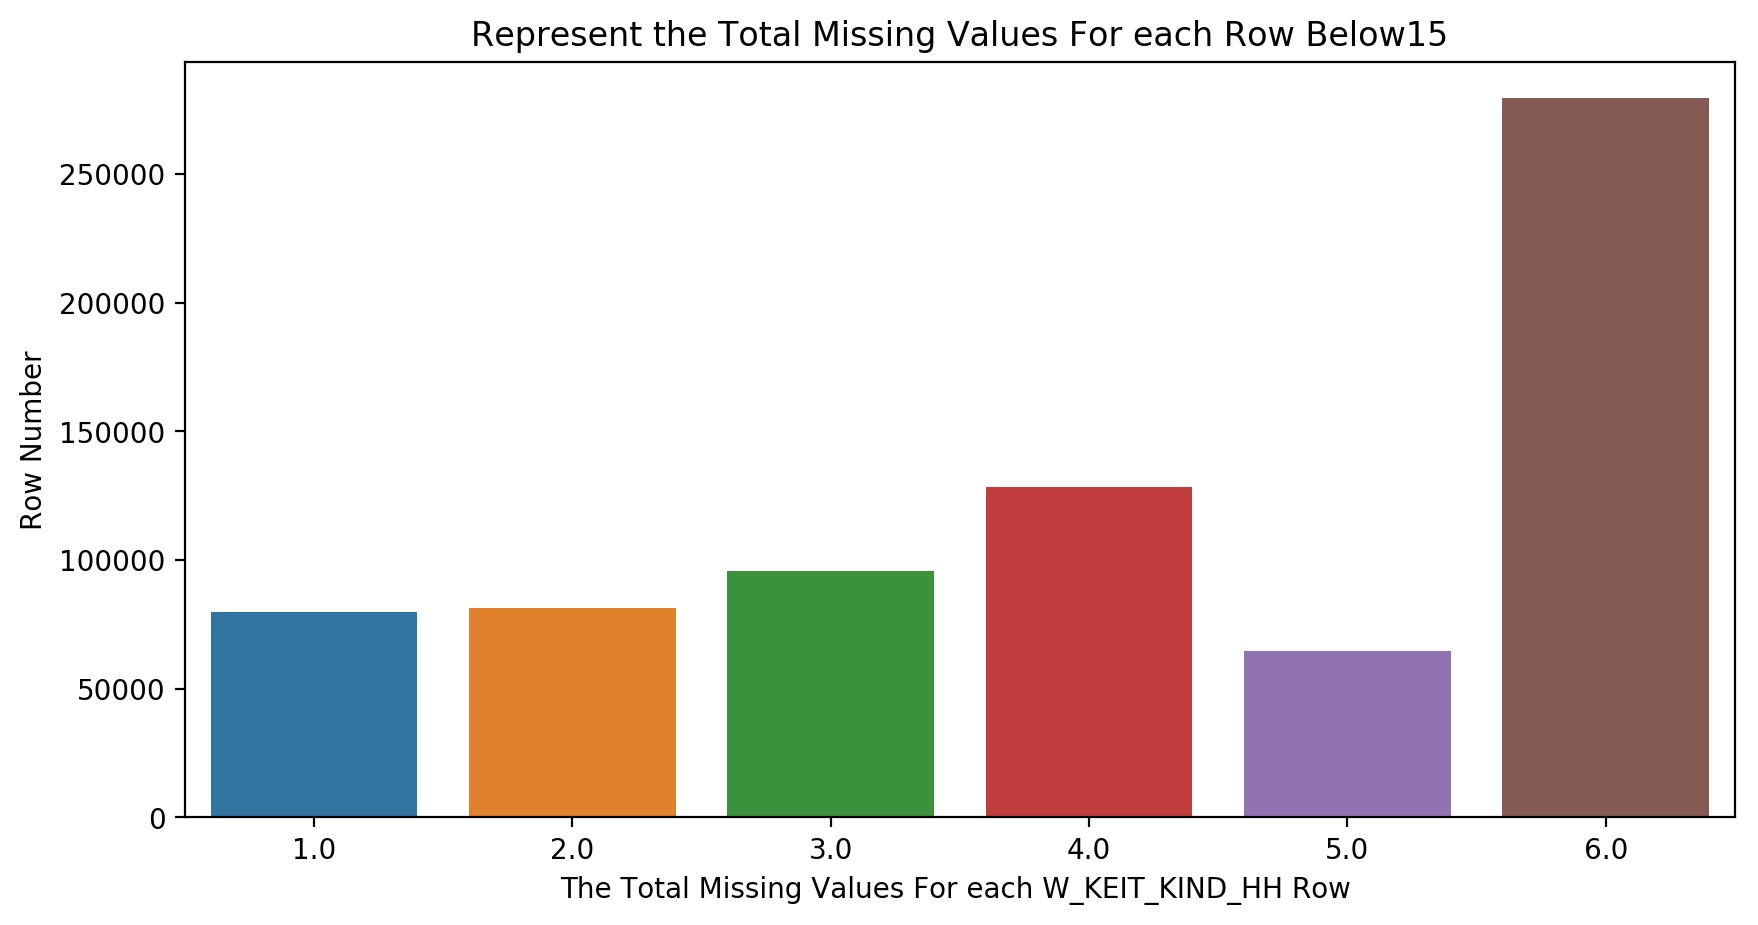

In [26]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.


## Third charts
# ============
plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasOver15['W_KEIT_KIND_HH'])
plt.title("Represent the Total Missing Values For each Row Over15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each W_KEIT_KIND_HH Row ')

plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasBelow15['W_KEIT_KIND_HH'])
plt.title("Represent the Total Missing Values For each Row Below15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each W_KEIT_KIND_HH Row ')


plt.show()


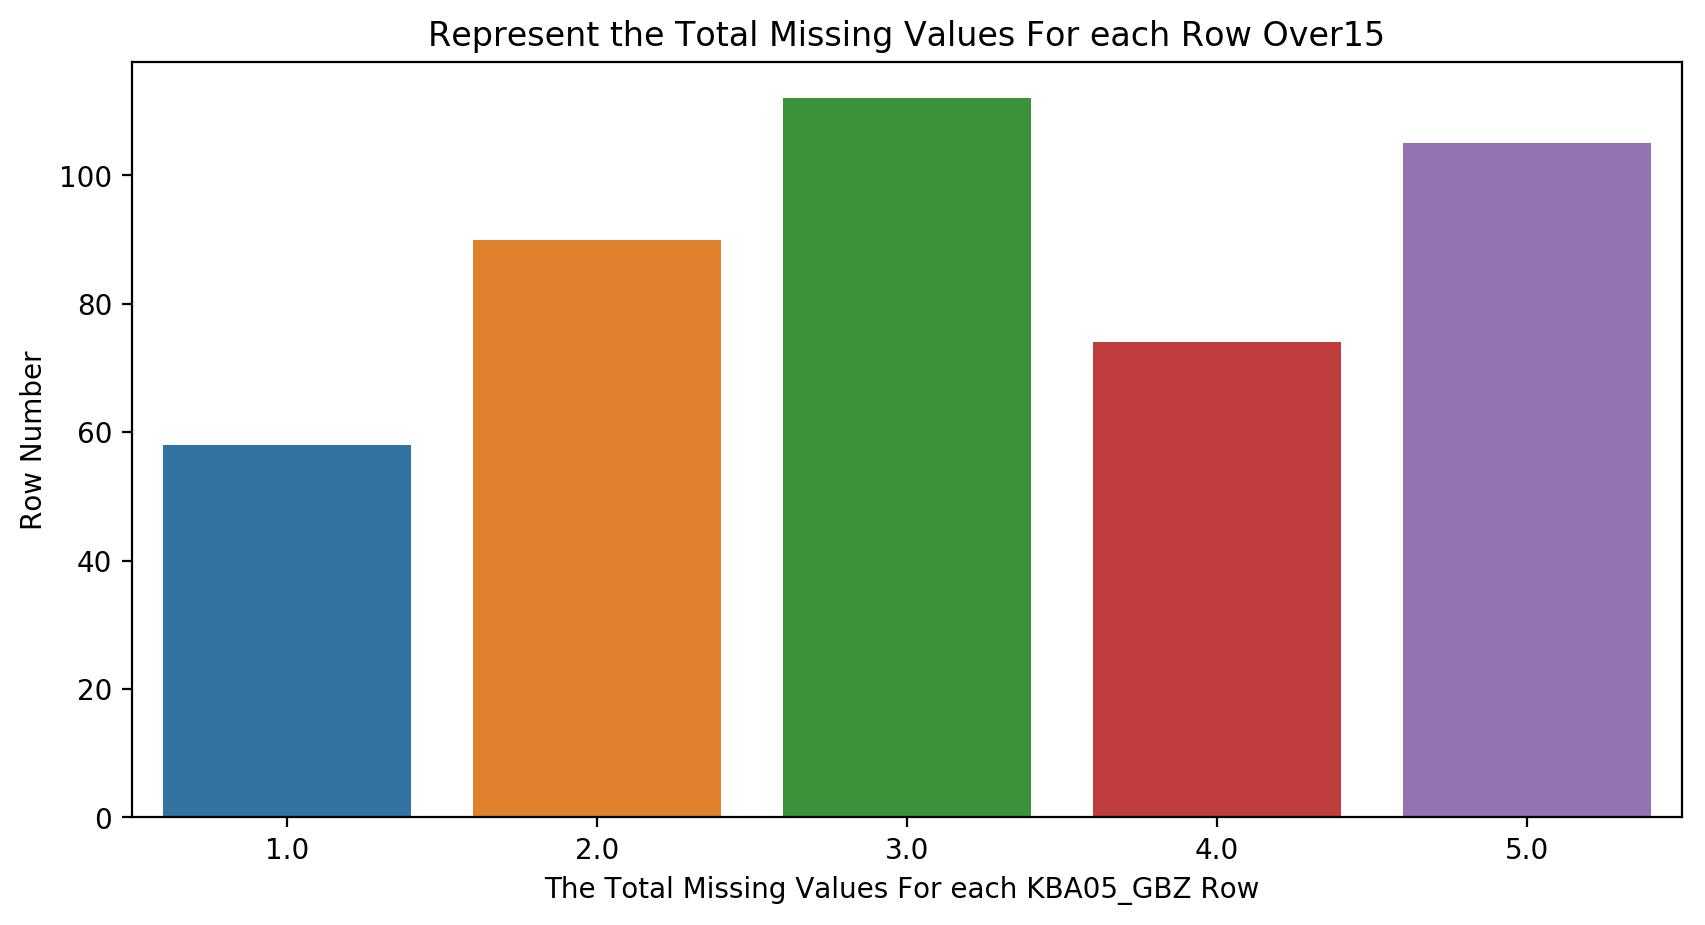

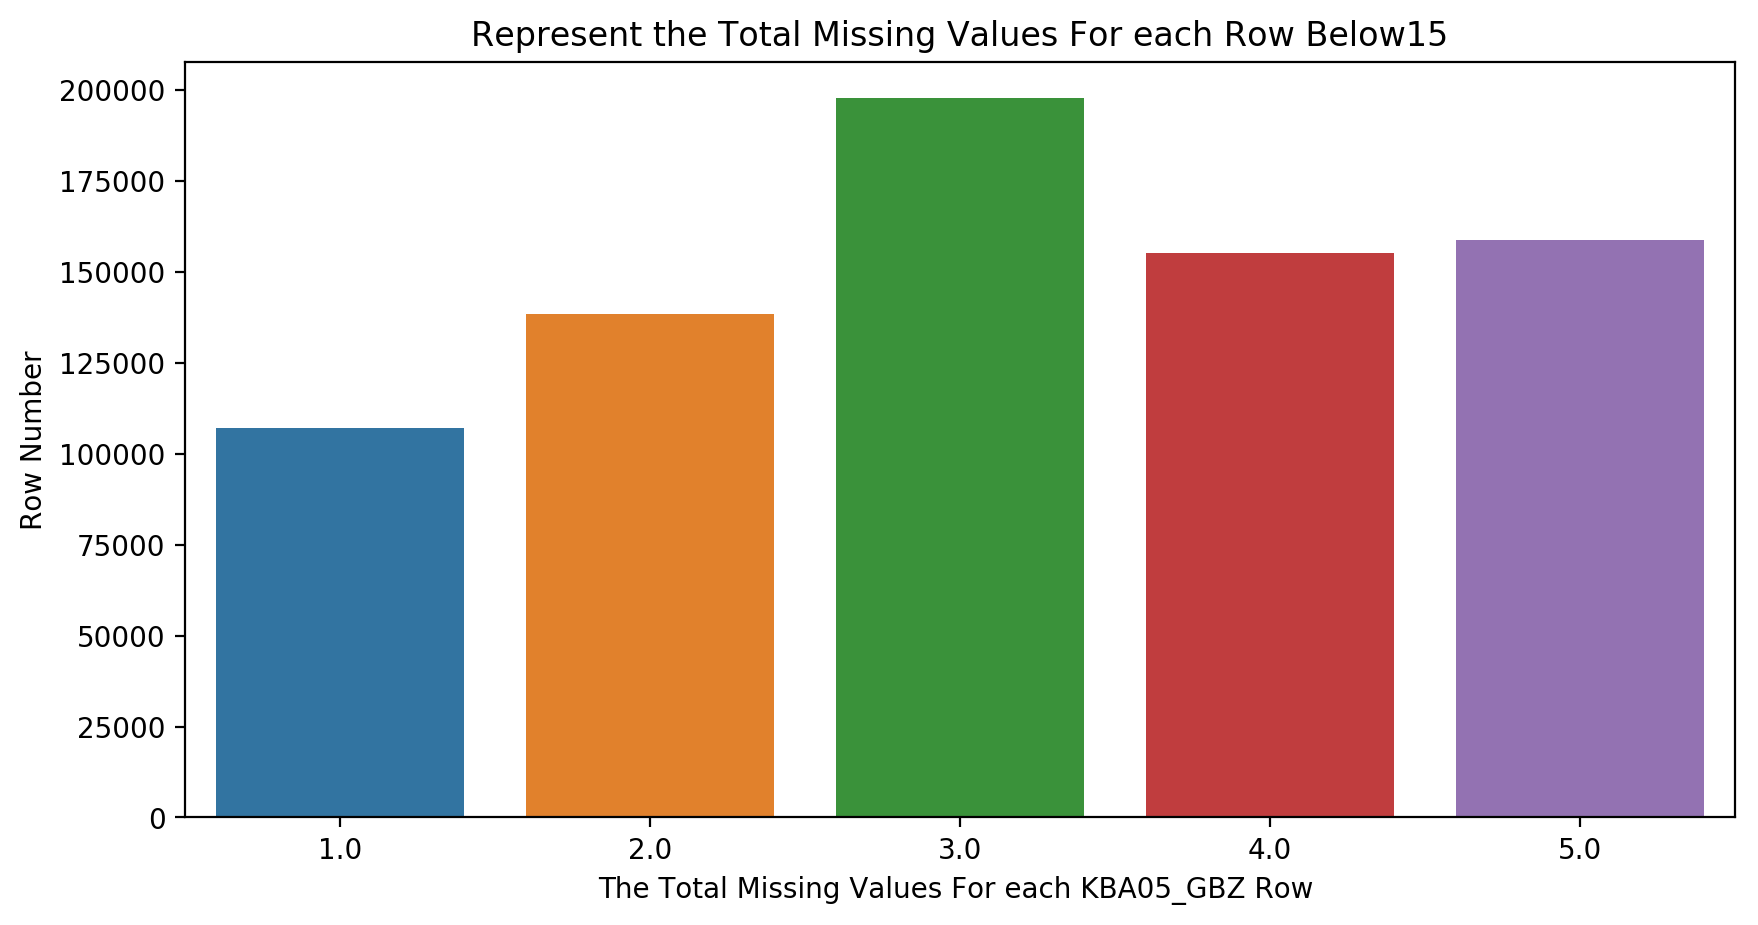

In [27]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.


## Fourth charts
# ============
plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasOver15['KBA05_GBZ'])
plt.title("Represent the Total Missing Values For each Row Over15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each KBA05_GBZ Row ')

plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasBelow15['KBA05_GBZ'])
plt.title("Represent the Total Missing Values For each Row Below15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each KBA05_GBZ Row ')


plt.show()



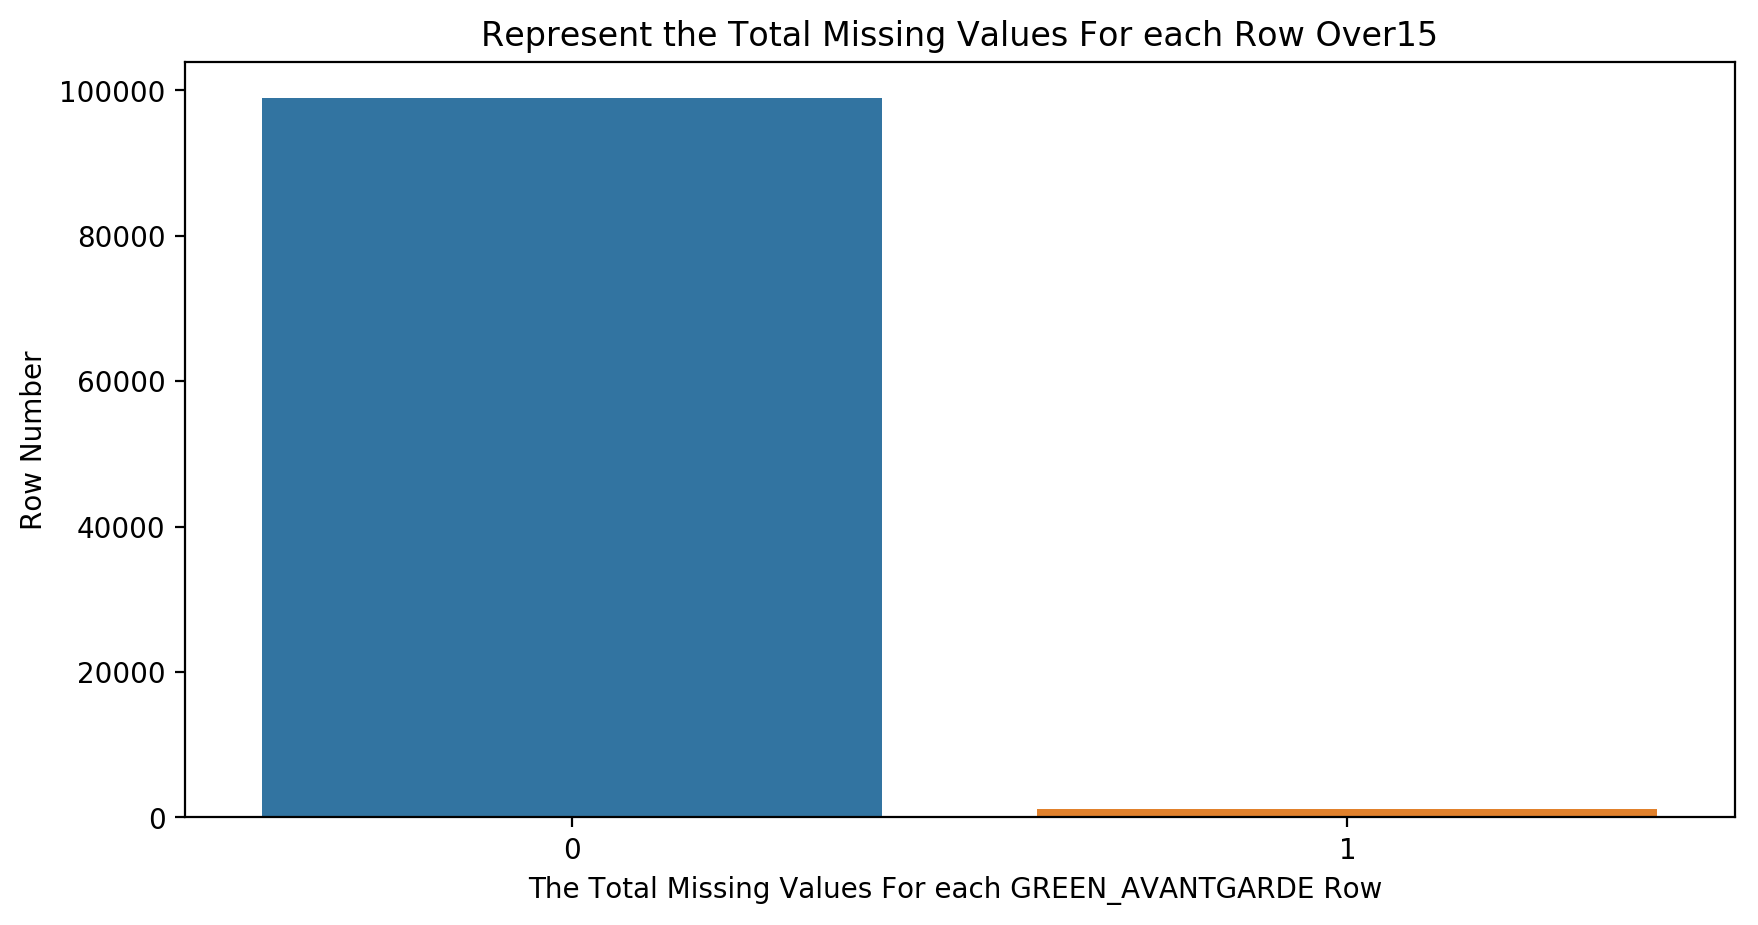

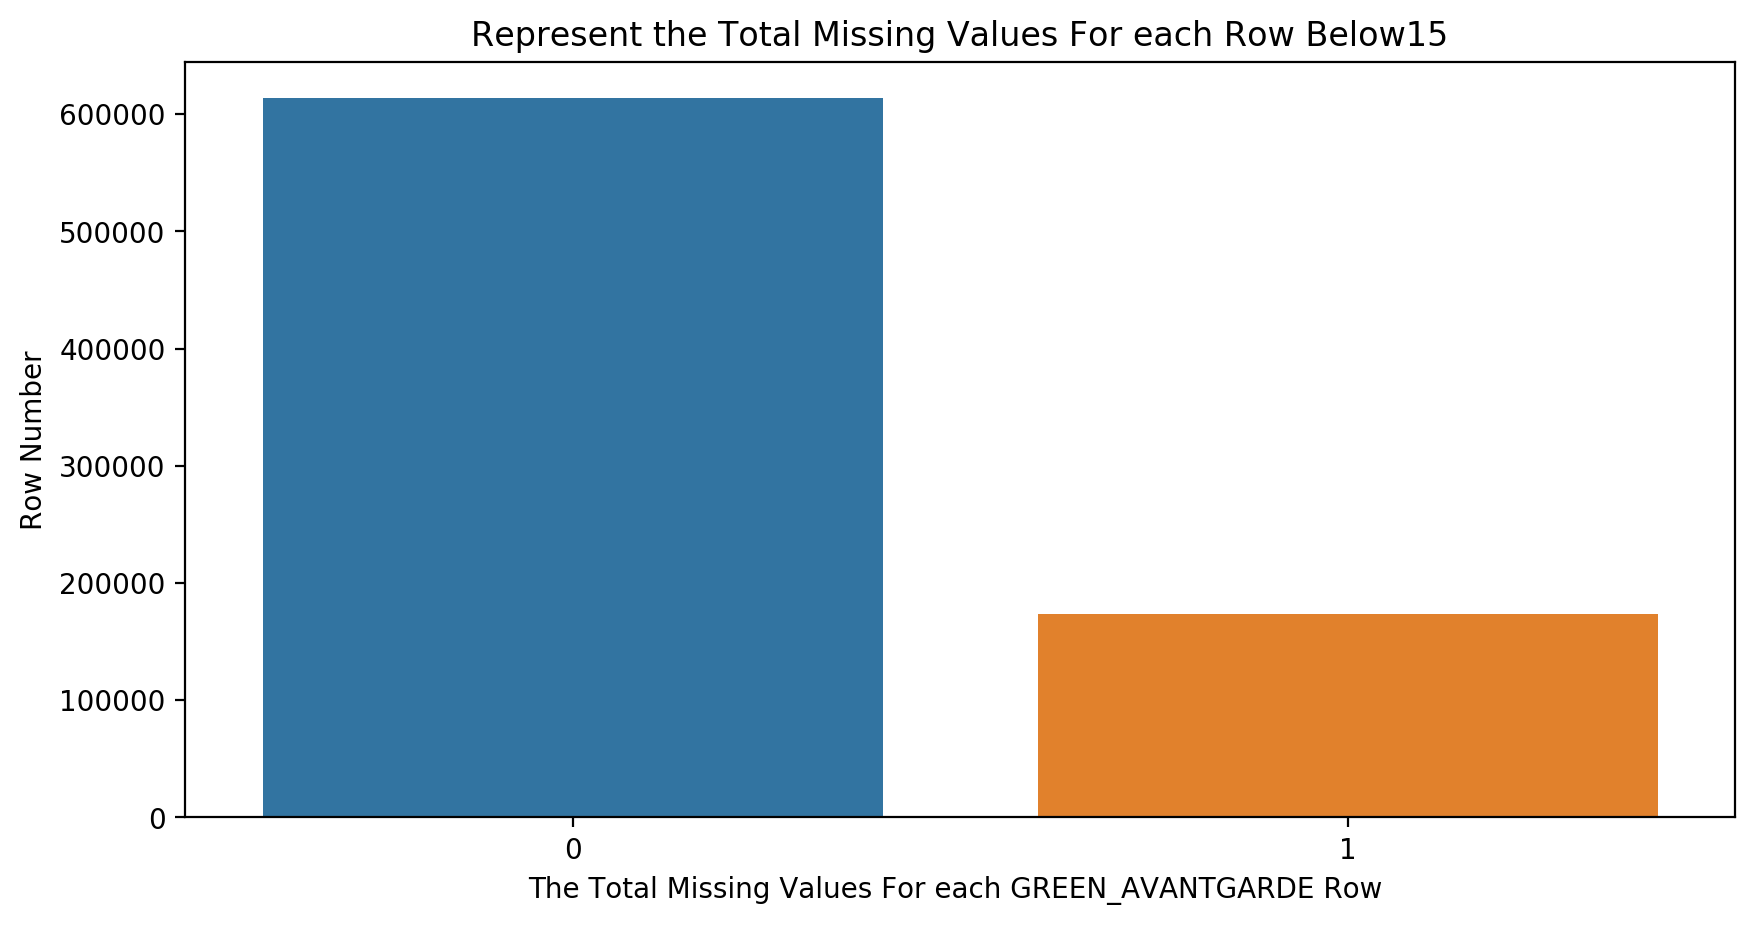

In [28]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.


## Fifth charts
# ============
plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasOver15['GREEN_AVANTGARDE'])
plt.title("Represent the Total Missing Values For each Row Over15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each GREEN_AVANTGARDE Row ')

plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(azdiasBelow15['GREEN_AVANTGARDE'])
plt.title("Represent the Total Missing Values For each Row Below15")
plt.ylabel('Row Number')
plt.xlabel('The Total Missing Values For each GREEN_AVANTGARDE Row ')


plt.show()



#### Discussion 1.1.3: Assess Missing Data in Each Row


> **The Answer**

=====================


**The observations**  we can clearly notice regarding the amount of missing data in each Row


that is most rows have less or more than 15 % distributions of values between the two datasets are similar in most visulaization in **the rows selected  such as:**  `GREEN_AVANTGARDE`, `KBA05_GBZ`, `W_KEIT_KIND_HH` , `KKK`, `ANREDE_KZ`.



### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [29]:
# How many features are there of each data type?

lst = azdias.columns.tolist()

feat_info_clean = feat_info[feat_info['attribute'].isin(lst)]

## check the (feat_info) by summary of types .

data_type_count = feat_info_clean['type'].value_counts()

data_type_count.head()

ordinal        49
categorical    18
numeric         6
mixed           6
interval        1
Name: type, dtype: int64


> **The observations** we can clearly notice the data type features , but also we can review the attribute in more details as below when use head()


In [30]:
## check the (feat_info) types in details .

feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


> **Now, back to the requirement above we need to work**

- Special handling for the remaining two variable types: `categorical`, and `mixed`.


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [31]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

cat_var = feat_info_clean[feat_info_clean['type'] == 'categorical']


In [32]:
# Re-encode categorical variable(s) to be kept in the analysis.

binary_level_categoricals = []
multi_level_categoricals = []

for i in cat_var['attribute']:
    if azdiasBelow15[i].nunique()==2:
        binary_level_categoricals.append(i)
    else:
        multi_level_categoricals.append(i)
        

In [33]:
## display our binary_level_categoricals

binary_level_categoricals

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

In [34]:
## display our multi_level_categoricals

multi_level_categoricals

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

> **Now, back to the requirement above we need to work**

=============================================================

- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.



> **My decision is drop them (multi_level_categoricals) from the analysis**

In [35]:
azdias = azdias.drop(multi_level_categoricals,axis=1)



#### Discussion 1.2.1: Re-Encode Categorical Features

.

> **The Answer**

=====================


**The observations**  we can reporting depending on my findings and decisions regarding categorical features.

multi_level_categoricals


- I keep the (binary_level_categoricals ) , and drop (multi_level_categoricals).


- And about engineering steps I performed is represented by re_encoding the multi_level for features which produce large data.

.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

> # 💡 Hint


> ================

> <mark> **By check  (( `Data_Dictionary.md` ))  for the details needed to finish these tasks , I copy & paste the (( `PRAEGENDE_JUGENDJAHRE` )) to analysis it**</mark>


.

### 1.18. PRAEGENDE_JUGENDJAHRE

==============================================


Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

.


In [36]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.


# from the PRAEGENDE_JUGENDJAHRE we will engineer  decade and  movement (mainstream vs. avantgarde) 

# so we make our decionary map for decade

decade = {1:40, 2:40, 3:50, 4:50, 5:60, 6:60, 7:60, 8:70, 9:70, 10:80, 11:80, 12:80, 13:80, 14:90, 15:90, np.nan:np.nan}

azdias['PRAEGENDE_JUGENDJAHRE_decade'] = azdias['PRAEGENDE_JUGENDJAHRE']
azdias['PRAEGENDE_JUGENDJAHRE_decade'] = azdias['PRAEGENDE_JUGENDJAHRE_decade'].map(decade)


# Now we make our decionary map for movement

movement = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0, np.nan:np.nan}

azdias['PRAEGENDE_JUGENDJAHRE_movement'] = azdias['PRAEGENDE_JUGENDJAHRE']
azdias['PRAEGENDE_JUGENDJAHRE_movement'] = azdias['PRAEGENDE_JUGENDJAHRE_movement'].map(movement)

                                                

> # 💡 Hint


> ================



### Now , Same steps I make to Investigate (( CAMEO_INTL_2015 )) and engineer two new variables.



> <mark> **By breaking  up the two-digit codes by their `tens`-place and `ones`-place digits , But first we need to  check ((`Data_Dictionary.md`))  for the details needed to finish these tasks , I copy & paste the (( `CAMEO_INTL_2015` )) to analysis it**</mark>


.


### 4.3. CAMEO_INTL_2015

======================================


German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

-----


In [37]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.


## Now from the German CAMEO we will engineer  : (( Wealth ))  or (( Life )) Stage Typology 

#so we can  map  them into our code

## from requirements above I understand to break up the two-digit codes by their 'tens'-place and 'ones'-place digits


## But first we have to convert ((CAMEO_INTL_2015)) to numbers and I chose float


azdias['CAMEO_INTL_2015']=azdias['CAMEO_INTL_2015'].astype(float) 


# Now we can  decionary and map our WealthStage

WealthStage = {11:1, 12:1, 13:1, 14:1, 15:1, 21:2, 22:2, 23:2, 24:2 ,25:2, 31:3, 32:3, 33:3, 34:3 ,35:3,
               41:4,  42:4, 43:4, 44:4 ,45:4, 51:5,  52:5, 53:5, 54:5 ,55:5}

azdias['CAMEO_INTL_2015_WealthStage'] = azdias['CAMEO_INTL_2015']
azdias['CAMEO_INTL_2015_WealthStage'] = azdias['CAMEO_INTL_2015_WealthStage'].map(WealthStage)


# Also make decionary and map our LifeStage

LifeStage = {11:1, 12:2, 13:3, 14:4, 15:5, 21:1, 22:2, 23:3, 24:4 ,25:5, 31:1, 32:2, 33:3, 34:4 ,35:5,
             41:1,  42:2, 43:3, 44:4 ,45:5,51:1,  52:2, 53:3, 54:4 ,55:5}

azdias['CAMEO_INTL_2015_LifeStage'] = azdias['CAMEO_INTL_2015']
azdias['CAMEO_INTL_2015_LifeStage'] = azdias['CAMEO_INTL_2015_LifeStage'].map(LifeStage)


In [38]:
## Finally we drop the Mixed-Type Features (( with issues ))  as required  above 

azdias = azdias.drop(['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015'],axis=1)




### Discussion 1.2.2: Engineer Mixed-Type Features

.


> **The Answer**

=====================


**The observations**  we can reporting depending on my findings and decisions regarding Engineer Mixed-Type Features in these steps : 



- I keep the two mixed-value features  ((PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 )) 


- I created new two feature columns which copied thier values from the original feature of mixed-value.


- Then generate two dictionaries and map the new feature values.


- Using the dictionaries for new feature columns to replace operation


- Finally we drop the Mixed-Type Features.


.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [39]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [40]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [41]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
   ## make a loop to located our changes column 

    for col in range(len(feat_info)):

    ## we create new columns for the (( missing_or_unknown )) to make changes on it  

        MissingToRemove = feat_info.iloc[col]['missing_or_unknown']  

    ## The changes required here is remove [] so we can make our loop and clear our data 
        MissingToRemove = MissingToRemove.strip('[')
        MissingToRemove = MissingToRemove.strip(']')
        MissingToRemove = MissingToRemove.split(sep=',')
    ## change the data type 
        MissingToRemove = [int(value) if (value!='X' and value!='XX' and value!='') else value for value in MissingToRemove]
    ##  When do not have missing values 
        if MissingToRemove != ['']:
            azdias = azdias.replace({feat_info.iloc[col]['attribute']: MissingToRemove}, np.nan) 
    
    
    
    for col in df.columns:
        df_clean = df_clean.replace({col: ['XX', 'X']}, np.nan)
   
     
  ## Remove the outlier columns from the dataset.

    outlierOver40 = missing_4each_column[missing_4each_column>40]
    
    azdias.drop(outlierOver40.index, axis=1 , inplace = True)
    
    
        # Re-encode categorical variable(s) to be kept in the analysis.
        
    cat_var = feat_info_clean[feat_info_clean['type'] == 'categorical']


        # re-encode binary feature
    binary_level_categoricals = []
    multi_level_categoricals = []

    for i in cat_var['attribute']:
        if azdiasBelow15[i].nunique()==2:
            binary_level_categoricals.append(i)
        else:
            multi_level_categoricals.append(i)
            
            
        
    new_values = {'W': 0, 'O': 1}
    
    df_clean = df_clean.replace({'OST_WEST_KZ':new_values})
    
      # remove selected columns and rows, ..  
    
    
    
    azdias = azdias.drop(multi_level_categoricals,axis=1)
    


    #  our decionary map for movement
    
   
    decade = {1:40, 2:40, 3:50, 4:50, 5:60, 6:60, 7:60, 8:70, 9:70, 10:80, 11:80, 12:80, 13:80, 14:90, 15:90, np.nan:np.nan}

    azdias['PRAEGENDE_JUGENDJAHRE_decade'] = azdias['PRAEGENDE_JUGENDJAHRE']
    azdias['PRAEGENDE_JUGENDJAHRE_decade'] = azdias['PRAEGENDE_JUGENDJAHRE_decade'].map(decade)


    # Now we make our decionary map for movement

    movement = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0, np.nan:np.nan}

    azdias['PRAEGENDE_JUGENDJAHRE_movement'] = azdias['PRAEGENDE_JUGENDJAHRE']
    azdias['PRAEGENDE_JUGENDJAHRE_movement'] = azdias['PRAEGENDE_JUGENDJAHRE_movement'].map(movement)
    azdias['CAMEO_INTL_2015']=azdias['CAMEO_INTL_2015'].astype(float) 


    # decionary and map our WealthStage

    WealthStage = {11:1, 12:1, 13:1, 14:1, 15:1, 21:2, 22:2, 23:2, 24:2 ,25:2, 31:3, 32:3, 33:3, 34:3 ,35:3,
                   41:4,  42:4, 43:4, 44:4 ,45:4, 51:5,  52:5, 53:5, 54:5 ,55:5}

    azdias['CAMEO_INTL_2015_WealthStage'] = azdias['CAMEO_INTL_2015']
    azdias['CAMEO_INTL_2015_WealthStage'] = azdias['CAMEO_INTL_2015_WealthStage'].map(WealthStage)


    # Also make decionary and map our LifeStage

    LifeStage = {11:1, 12:2, 13:3, 14:4, 15:5, 21:1, 22:2, 23:3, 24:4 ,25:5, 31:1, 32:2, 33:3, 34:4 ,35:5,
                 41:1,  42:2, 43:3, 44:4 ,45:5,51:1,  52:2, 53:3, 54:4 ,55:5}

    azdias['CAMEO_INTL_2015_LifeStage'] = azdias['CAMEO_INTL_2015']
    azdias['CAMEO_INTL_2015_LifeStage'] = azdias['CAMEO_INTL_2015_LifeStage'].map(LifeStage)


                   ## Finally we drop the Mixed-Type Features (( with issues ))  as required  above 

    azdias = azdias.drop(['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015'],axis=1)
    
    # Return the cleaned dataframe.
    return df_clean                #### MMMM Here is my last update

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [43]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

missingClean = Imputer(strategy='mean')

azdias= pd.DataFrame(missingClean.fit_transform(azdias), columns = azdias.columns)

azdias.isna().sum().sum()


0

In [44]:
## make it in clear result statment 

print('After cleaned I investigate and find all NaN values is removed and equl (' , azdias.isna().sum().sum() ,' )')

After cleaned I investigate and find all NaN values is removed and equl ( 0  )


In [45]:
# Apply feature scaling to the general population demographics data.

# As recomended from above (( For the actual scaling function, a StandardScaler instance is suggested,so i use it))
scaler = StandardScaler() 

azdias_scaler= pd.DataFrame(scaler.fit_transform(azdias), columns = azdias.columns)

azdias_scaler.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_decade,PRAEGENDE_JUGENDJAHRE_movement,CAMEO_INTL_2015_WealthStage,CAMEO_INTL_2015_LifeStage
0,-0.750972,-1.045218,-0.056416,0.804890,-0.303378,1.285741,1.429871,-0.055511,-0.494701,0.000000,...,6.526418e-16,-4.890471e-16,-4.284963e-16,-4.709754e-16,2.042688e-15,-3.458487e-16,3.116720e-15,8.525720e-16,3.216984e-16,6.346104e-16
1,-1.742724,0.956738,-1.570358,1.487601,-1.059731,1.285741,0.757254,1.422415,-0.494701,1.146266,...,-6.935961e-01,1.527612e+00,5.971822e-01,-1.767775e-01,-1.349507e-01,7.234631e-01,1.218829e+00,5.727990e-01,1.258937e+00,-1.338297e+00
2,0.240781,0.956738,-1.570358,0.804890,-1.816084,-0.675554,0.084637,1.422415,2.021423,1.146266,...,-6.935961e-01,4.263757e-01,5.971822e-01,-1.767775e-01,-1.349507e-01,-8.341011e-01,1.218829e+00,-1.986963e+00,-9.142640e-01,8.052265e-01
3,1.232533,0.956738,0.700556,-0.560532,1.209329,-0.675554,-1.260597,-0.794475,-0.494701,-0.269102,...,-6.935961e-01,-6.748605e-01,5.971822e-01,-1.237320e+00,-1.054896e+00,-5.531897e-02,-2.433020e-01,5.727990e-01,-1.638664e+00,-6.237891e-01
4,0.240781,-1.045218,0.700556,0.122179,0.452976,-1.329319,0.084637,-0.794475,-0.494701,1.146266,...,4.121331e-02,-6.748605e-01,-3.677058e-01,8.837647e-01,3.250218e-01,1.502245e+00,-2.433020e-01,5.727990e-01,5.345367e-01,9.071870e-02


### Discussion 2.1: Apply Feature Scaling

.



> **The Answer**

=====================


**The observations**  we can reporting depending on my findings and decisions regarding regarding feature scaling in these steps : 

 
- I replaced the  missing values with the ( Mean // Average )  value by using the Imputer .


- Then scaled all features using the StandardScaler


- Using the dictionaries for new feature columns to replace operation



.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [46]:
# Apply PCA to the data.

featureScaler = scaler.fit_transform(azdias)

featureScaler.shape[1]


from sklearn.decomposition import PCA

n_components = featureScaler.shape[1] // 2 ## so I make average 



pca = PCA(n_components= n_components)

pca = pca.fit(featureScaler)

In [47]:
n_components

34

In [48]:
# Investigate the variance accounted for by each principal component.

print(pca.explained_variance_ratio_)


[ 0.16741895  0.12622076  0.08591011  0.05424031  0.04056707  0.03260621
  0.02993735  0.02502641  0.02334973  0.02115626  0.0205145   0.01933463
  0.01899102  0.01750623  0.01729883  0.01552192  0.01534486  0.0144911
  0.01337389  0.01227276  0.01203512  0.01124975  0.01112491  0.01072764
  0.01043912  0.00949325  0.00931832  0.00828402  0.00743297  0.00720416
  0.0070385   0.00674985  0.00653764  0.00621377]


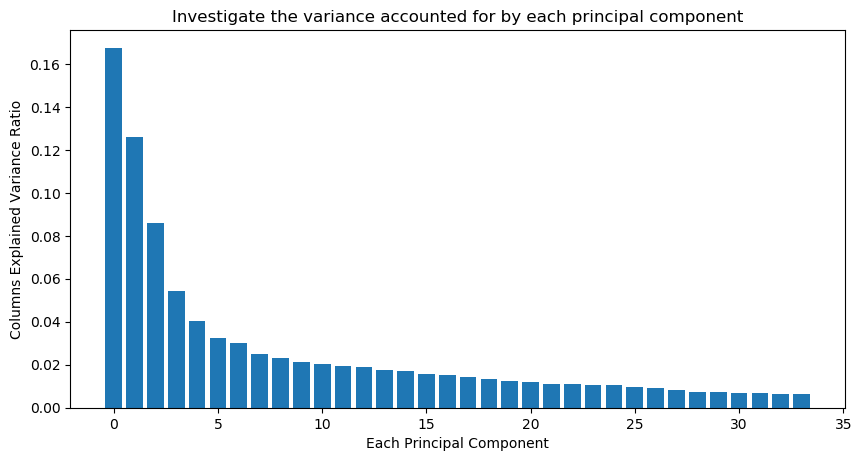

In [49]:
explained_variance = pca.explained_variance_ratio_
explained_variance

theComponents = np.arange(n_components) 
plt.figure(figsize = (10,5), dpi = 100)
plt.bar (theComponents, explained_variance)
plt.title("Investigate the variance accounted for by each principal component")
plt.ylabel('Columns Explained Variance Ratio')
plt.xlabel('Each Principal Component')
plt.show()

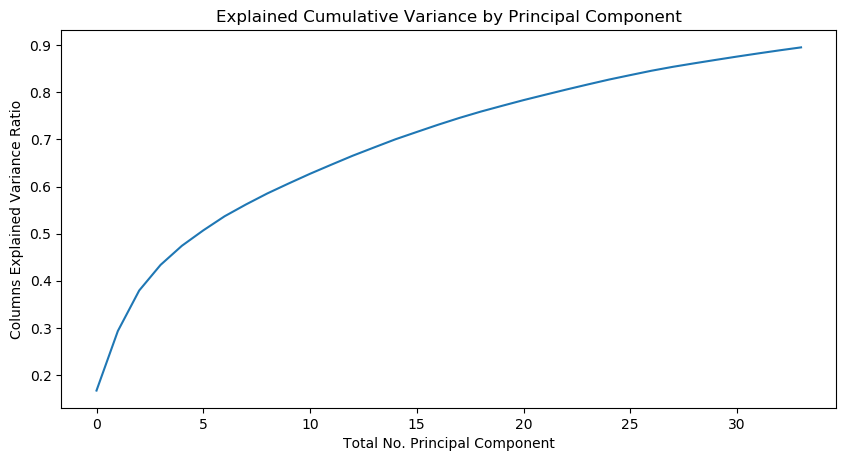

In [50]:
# Re-apply PCA to the data while selecting for number of components to retain.
plt.figure(figsize = (10,5), dpi = 100)
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Explained Cumulative Variance by Principal Component")
plt.ylabel('Columns Explained Variance Ratio')
plt.xlabel('Total No. Principal Component')

plt.show()

In [51]:
# To know the Cumulative Variance by  explained_variance_ratio_

pca.explained_variance_ratio_.sum()

0.89493192225858353

In [52]:
# Re-apply PCA to the data while selecting for number of components to retain.

## Here  after comparing the n_components ( 34 )  with the Cumulative explained Variance more than ( 89% ).

# I decisdes to re-apply PCA to the data as below

pcaToData = pca.transform(featureScaler)

In [54]:
# examp
pca_34 = PCA(n_components=34)

pcaForazdias = pca_34.fit_transform(azdias_scaler)


### Discussion 2.2: Perform Dimensionality Reduction


.



> **The Answer**

=====================


**The observations**  we can reporting depending on my findings and decisions regarding regarding dimensionality reduction is : 

 
- Retain `n_components` ( 34 ) principal components  will expalain  `Cumulative explained Variance` more than ( 89% ).

.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [55]:
# HINT: Try defining a function here or in a new cell that you can reuse in the     
# other cells.
#  azdias= pd.DataFrame(scaler.fit_transform(azdias), columns = azdias.columns)


def weightsForPca(pca, i):
    
    df = pd.DataFrame(pca.components_, columns=list(azdias_scaler.columns))
    
    weights = df.iloc[i].sort_values(ascending=False)
    
    return weights

In [56]:
# Map weights for the (( First ))  principal component to corresponding feature names

# and then print the linked values, sorted by weight.

pca_weight_0 = weightsForPca(pca_34, 0)


print (pca_weight_0)


PLZ8_ANTG3                        0.228293
PLZ8_ANTG4                        0.222599
PLZ8_BAUMAX                       0.217886
CAMEO_INTL_2015_WealthStage       0.202992
ORTSGR_KLS9                       0.201110
EWDICHTE                          0.198808
HH_EINKOMMEN_SCORE                0.174543
FINANZ_HAUSBAUER                  0.162976
PLZ8_ANTG2                        0.154732
KBA05_ANTG4                       0.152854
ARBEIT                            0.144023
RELAT_AB                          0.135837
ANZ_HAUSHALTE_AKTIV               0.135816
KBA05_ANTG3                       0.131949
FINANZ_SPARER                     0.109549
PRAEGENDE_JUGENDJAHRE_movement    0.098778
SEMIO_PFLICHT                     0.082366
SEMIO_REL                         0.075226
REGIOTYP                          0.067941
SEMIO_RAT                         0.067127
PRAEGENDE_JUGENDJAHRE_decade      0.066818
W_KEIT_KIND_HH                    0.057844
SEMIO_MAT                         0.056847
SEMIO_FAM  

In [57]:
# Map weights for the (( second )) principal component to corresponding feature names
# and then print the linked values, sorted by weight.


pca_weight_1 = weightsForPca(pca_34, 1)


print (pca_weight_1)


ALTERSKATEGORIE_GROB            0.271388
FINANZ_VORSORGER                0.256031
SEMIO_ERL                       0.217490
SEMIO_LUST                      0.185746
RETOURTYP_BK_S                  0.172186
W_KEIT_KIND_HH                  0.129522
FINANZ_MINIMALIST               0.111040
FINANZ_HAUSBAUER                0.090287
WOHNDAUER_2008                  0.068862
EWDICHTE                        0.063548
ORTSGR_KLS9                     0.062394
PLZ8_ANTG3                      0.060243
PLZ8_ANTG4                      0.057251
SEMIO_KRIT                      0.054654
PLZ8_BAUMAX                     0.052923
SEMIO_KAEM                      0.047410
ARBEIT                          0.047356
RELAT_AB                        0.045211
KBA05_ANTG4                     0.045111
HH_EINKOMMEN_SCORE              0.044598
CAMEO_INTL_2015_WealthStage     0.044002
ANREDE_KZ                       0.043836
ANZ_HAUSHALTE_AKTIV             0.042874
PLZ8_ANTG2                      0.041818
VERS_TYP        

In [58]:
# Map weights for the (( third ))  principal component to corresponding feature names

# and then print the linked values, sorted by weight.

pca_weight_2 = weightsForPca(pca_34, 2)


print (pca_weight_2)



SEMIO_VERT                        0.353368
SEMIO_SOZ                         0.291632
SEMIO_KULT                        0.287749
SEMIO_FAM                         0.243472
FINANZ_MINIMALIST                 0.135132
RETOURTYP_BK_S                    0.074481
SEMIO_MAT                         0.074255
SEMIO_REL                         0.068338
W_KEIT_KIND_HH                    0.062520
GREEN_AVANTGARDE                  0.060360
FINANZ_VORSORGER                  0.057186
PLZ8_BAUMAX                       0.033087
ALTERSKATEGORIE_GROB              0.031892
PLZ8_ANTG4                        0.029819
ORTSGR_KLS9                       0.028894
PLZ8_ANTG3                        0.028345
EWDICHTE                          0.027274
ARBEIT                            0.022629
RELAT_AB                          0.019402
HH_EINKOMMEN_SCORE                0.018646
PLZ8_ANTG2                        0.017963
WOHNDAUER_2008                    0.017688
CAMEO_INTL_2015_WealthStage       0.015735
KBA05_ANTG4


### Discussion 2.3: Interpret Principal Components

.


> **The Answer**

=====================


**The observations**  we can reporting depending on my findings regarding rfrom detailed investigation of the few principal components generated can be interpret in each ` principal component ` with positive and negative values as :

.


> **Form the (( First ))  principal component Map weights**


 - Positive values were :
 
        -  positive and negative values
        -  positive and negative values

 - Negative values were :
 
 
> **Form the (( second ))  principal component Map weights**


> **Form the (( third ))  principal component Map weights**





#### From the first principal component, it can be seen that

PLZ8_ANTG3 and PLZ8_ANTG4 have a positive correlation. The share of 10+ family homes and the share of 6-10 family homes for macro-cells tend to increase together.

PLZ8_ANTG3 and WEALTH also have a positive correlation. It indicates that when the share of 6-10 family homes in a macro-cell increases, it tends to have more poor households.

MOBI_REGIO and PLZ8_ANTG3 have a negative correlation. It means that when the share of 6-10 family homes in a macro-cell increases, it tends to have higher movements

> ## <a id="3"> Step 3: Clustering </a>


**======================================**


### Step 3.1: Apply Clustering to General Population




You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.






> # 💡 Hint


> ================

 
>  # <a id="10">Step 10: 💡 Hint :the needed work which I update in this version  </a>

.



In [59]:
# Over a number of different cluster counts...

    # run k-means clustering on the data and...
    
    
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',sep=';')

scores = []

centers = list(range (2,21,2))

for center in centers:
    
    kmeans = KMeans(n_clusters = center)
    model = kmeans.fit(pcaToData)
    score = np.abs(model.score(pcaToData))
    scores.append(score)

 
    # compute the average within-cluster distances.
    
    

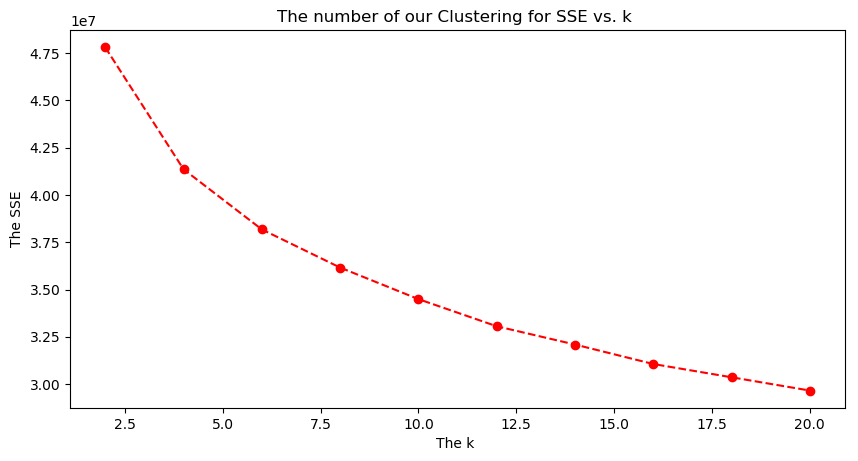

In [88]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.


## my update charts

# ============

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(centers, scores, linestyle='--', marker='o', color='r');

plt.title("The number of our Clustering for SSE vs. k ")

plt.ylabel('The SSE')

plt.xlabel('The k ')

plt.show()

In [89]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans = KMeans(n_clusters = 13)
    
model = kmeans.fit(pcaToData)
    
labels_general = model.predict(pcaToData)




### Discussion 3.1: Apply Clustering to General Population

.

> **The Answer**

=====================


**The observations** my findings and decisions regarding clustering is choose (( 13 )) to make it average distance and decrease get smaller than before.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [94]:
# Load in the customer demographics data.

customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',sep=';')

In [95]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_to_clean = clean_data(customers)

In [96]:
print(customers_to_clean)


None


In [97]:

# Apply scaler

customers_scaled = scaler.transform(customers_to_clean)

customers_scaled = pd.DataFrame(customers_scaled, columns=customers_to_clean.columns)


# customers transformation using the PCA


customers_pca = pca.transform(customers_scaled)


# Predict  using the Kmeans model

customers_pred = kmeans.predict(customers_pca)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

NameError: name 'customers_pred' is not defined

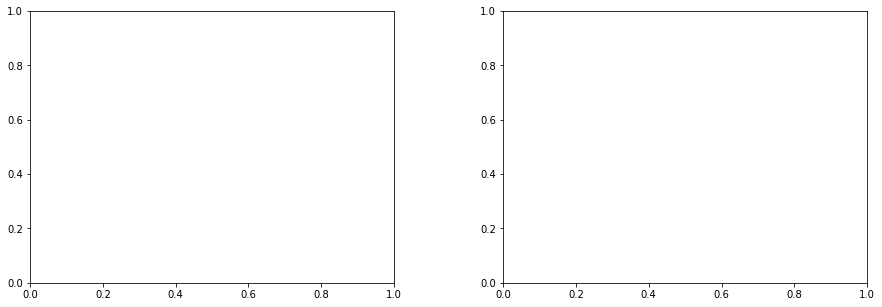

In [98]:
# Compare the proportion of data in each cluster for the customer data to the

# proportion of data in each cluster for the general population.


figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

figure.subplots_adjust(hspace = 1, wspace=.3)


sns.countplot(customers_pred, ax=axs[0])

axs[0].set_title('Customer Clusters')



sns.countplot(labels_general, ax=axs[1])

axs[1].set_title('General Clusters')


In [100]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?


In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?



### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.